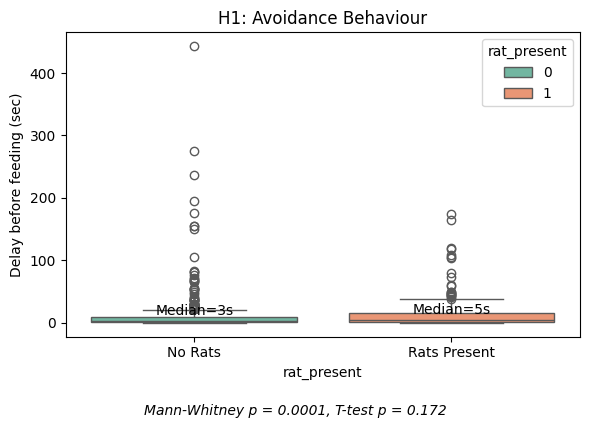

In [5]:
# ================================================================
# Investigation A: Hypothesis Testing
# ================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency

# Load cleaned datasets (adjust paths if needed)
df1_clean = pd.read_csv("cleaned_dataset/dataset1_cleaned.csv")
df2_clean = pd.read_csv("cleaned_dataset/dataset2_cleaned.csv")
# ================================================================
# Hypothesis 1: Avoidance behaviour (Dataset 1)
# ================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency

with_rats = df1_clean[df1_clean['rat_present'] == 1]['bat_landing_to_food']
without_rats = df1_clean[df1_clean['rat_present'] == 0]['bat_landing_to_food']

# Calculate medians
med_no = without_rats.median()
med_yes = with_rats.median()

# Run stats
t_stat, pval_t = ttest_ind(with_rats, without_rats, equal_var=False, nan_policy='omit')
u_stat, pval_u = mannwhitneyu(with_rats, without_rats, alternative='two-sided')

# Boxplot with annotations
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='rat_present', y='bat_landing_to_food', hue='rat_present',data=df1_clean, palette="Set2")
plt.xticks([0,1], ['No Rats','Rats Present'])
plt.ylabel("Delay before feeding (sec)")
plt.title("H1: Avoidance Behaviour")

# Annotate medians & p-value
plt.text(0, med_no+10, f"Median={med_no:.0f}s", ha='center', color="black")
plt.text(1, med_yes+10, f"Median={med_yes:.0f}s", ha='center', color="black")

plt.figtext(0.5, -0.05, f"Mann-Whitney p = {pval_u:.4f}, T-test p = {pval_t:.3f}", 
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

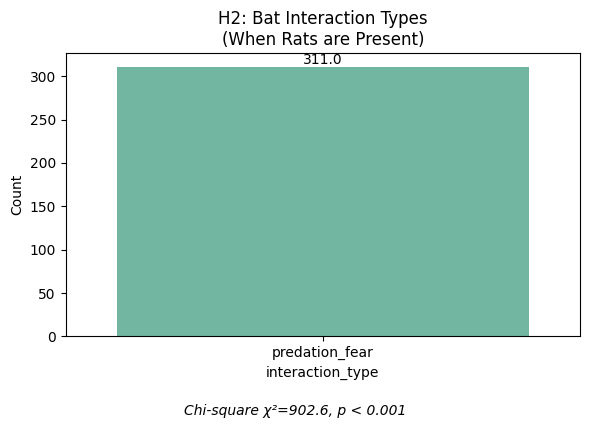

In [7]:
# ================================================================
# Hypothesis 2: Interaction Types (Dataset 1, only when rats present)
# ================================================================
contingency = pd.crosstab(df1_clean['rat_present'], df1_clean['interaction_type'])
chi2, pval_chi, dof, expected = chi2_contingency(contingency)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='interaction_type', 
                       hue='interaction_type', 
                   data=df1_clean[df1_clean['rat_present']==1], 
                   palette="Set2")

plt.title("H2: Bat Interaction Types\n(When Rats are Present)")
plt.ylabel("Count")

# Annotate bar values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.figtext(0.5, -0.05, f"Chi-square χ²={chi2:.1f}, p < 0.001", 
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

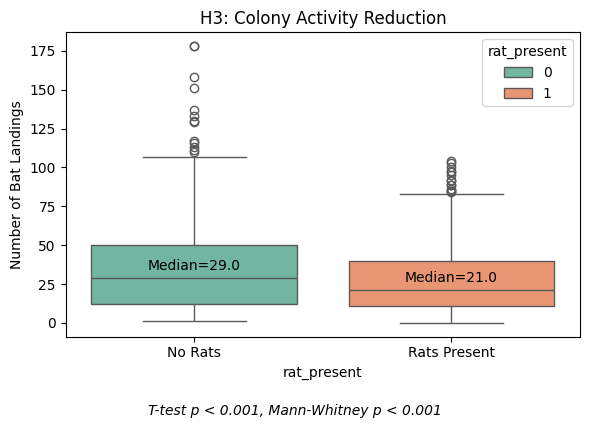

In [9]:
# ================================================================
# Hypothesis 3: Colony-level bat activity (Dataset 2)
# ================================================================
with_rats = df2_clean[df2_clean['rat_present'] == 1]['bat_landing_number']
without_rats = df2_clean[df2_clean['rat_present'] == 0]['bat_landing_number']

# Means/medians
mean_no, mean_yes = without_rats.mean(), with_rats.mean()
med_no, med_yes = without_rats.median(), with_rats.median()

# Stats
t_stat, pval_t = ttest_ind(with_rats, without_rats, equal_var=False, nan_policy='omit')
u_stat, pval_u = mannwhitneyu(with_rats, without_rats, alternative='two-sided')

# Boxplot
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='rat_present', y='bat_landing_number', 
                 data=df2_clean, palette="Set2", hue='rat_present')
plt.xticks([0,1], ['No Rats','Rats Present'])
plt.ylabel("Number of Bat Landings")
plt.title("H3: Colony Activity Reduction")

# Annotate medians
plt.text(0, med_no+5, f"Median={med_no}", ha='center', color="black")
plt.text(1, med_yes+5, f"Median={med_yes}", ha='center', color="black")

# Annotate p-values
plt.figtext(0.5, -0.05, f"T-test p < 0.001, Mann-Whitney p < 0.001", 
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()